In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
ls centers*.txt

centers10.txt  centers21.txt  centers32.txt  centers43.txt  centers54.txt
centers11.txt  centers22.txt  centers33.txt  centers44.txt  centers55.txt
centers12.txt  centers23.txt  centers34.txt  centers45.txt  centers56.txt
centers13.txt  centers24.txt  centers35.txt  centers46.txt  centers5.txt
centers14.txt  centers25.txt  centers36.txt  centers47.txt  centers6.txt
centers15.txt  centers26.txt  centers37.txt  centers48.txt  centers7.txt
centers16.txt  centers27.txt  centers38.txt  centers49.txt  centers8.txt
centers17.txt  centers28.txt  centers39.txt  centers4.txt   centers9.txt
centers18.txt  centers29.txt  centers3.txt   centers50.txt
centers19.txt  centers2.txt   centers40.txt  centers51.txt
centers1.txt   centers30.txt  centers41.txt  centers52.txt
centers20.txt  centers31.txt  centers42.txt  centers53.txt


In [4]:
def compute_rcm(n_cluster,centroids,labels):
    #since all the particles have the same mass, the center of mass is  just the arithmetic average weighted by the number of particles in each cluster 
    numerator = 0
    n_tot = 0
    for i in np.arange(n_cluster):
        N = len(np.where(labels==i)[0]) #number of particles in each cluster
#         print "n_clusters:", i 
#         print "nuumber of particles in each cluster ", N
#         print "cluster center" , centroids[i]    
        numerator += centroids[i]*N 
#         print "numerator: " , numerator
        n_tot+=N
    rcm = numerator/n_tot
    return rcm
def compute_avrg_rad(n_cluster,centroids,labels):
    numerator = 0
    n_tot = 0
    for i in np.arange(n_cluster):
        numerator += np.linalg.norm(centroids[i]-compute_rcm(n_cluster,centroids,labels))
    return numerator/n_cluster

In [5]:
def verify_cm_calculation(n_cluster,centroids,labels):
    fig  = plt.figure()
    plt.title("xy projection for n_cluster = {}".format(n_cluster),fontsize=15)
    plt.plot(centers[:,0], centers[:,1],'o')
    rcm = compute_rcm(n_cluster,centroids,labels)
    plt.plot(rcm[0],rcm[1],"x", color = "red", markersize=13)
    rad = compute_avrg_rad(n_cluster,centroids,labels)
    circle1 = plt.Circle((rcm[0],rcm[1]),rad,color='g',fill=False)
    fig.gca().add_artist(circle1)
    plt.xlabel("X",fontsize=13)
    plt.ylabel("Y",fontsize=13)
    axes().set_aspect('equal', 'datalim')

The confusion here is that we want density for each clutster, not density of number of clusters . After that  we can average per cluster densities, but we don't want the total density which is what this code is computing right now

In the k=30 run, there was 30 resulting clusters, each has x ,y z loc (this should just be the CM!)

In [11]:
np.unique(labels)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.])

In [14]:
len(np.where(labels==6)[0])

24346

In [20]:
shape(labels)

(1572863,)

This is different from the total number of particles which means that there is no one to one correspondence betwee the index of the particles and the index in the labels array

So unfortunately we would have to rerun this and remember to actually write down the x,y,z, mass and label this time 

In [19]:
np.where(labels==6)[0]

array([111599, 111600, 122772, ..., 408525, 408526, 408527])

In [18]:
import yt
ds = yt.load("../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
x = ad[("all","particle_position_x")]
y = ad[("all","particle_position_y")]
z = ad[("all","particle_position_z")]
m = ad[("all","mass")]
idx = ad[("all","particle_index")]

yt : [INFO     ] 2015-11-02 20:27:59,371 Calculating time to be 4.344e+17 seconds
yt : [INFO     ] 2015-11-02 20:27:59,415 Parameters: current_time              = 4.3437787319e+17
yt : [INFO     ] 2015-11-02 20:27:59,416 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2015-11-02 20:27:59,417 Parameters: domain_left_edge          = [-45417.41686962 -45417.41686962 -45417.41686962]
yt : [INFO     ] 2015-11-02 20:27:59,418 Parameters: domain_right_edge         = [ 45417.41686962  45417.41686962  45417.41686962]
yt : [INFO     ] 2015-11-02 20:27:59,419 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2015-11-02 20:27:59,419 Parameters: current_redshift          = 2.48886713461e-08
yt : [INFO     ] 2015-11-02 20:27:59,419 Parameters: omega_lambda              = 0.704962
yt : [INFO     ] 2015-11-02 20:27:59,420 Parameters: omega_matter              = 0.295038
yt : [INFO     ] 2015-11-02 20:27:59,420 Parameters: hubble_constant           = 0.688062
yt : [INFO     ] 

Okay so the training set is always still the same, so we could jsut reference by dumping train test sample reslt into a file 

In [17]:
for k in np.arange(30):
    rad = compute_avrg_rad(k,centers,labels)
    print rad
    volume = 4./3.*np.pi*rad**3
    N=len(np.where(labels==k)[0])
    mass = 2.75491975e43 * N
    if k ==1:
        density =0 #undefined density for point mass
    else:
        density = mass / volume

0


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: divide by zero encountered in long_scalars


ZeroDivisionError: float division by zero

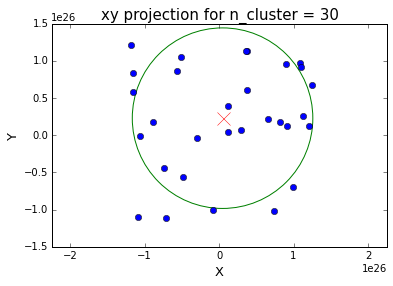

In [7]:
centers = np.loadtxt("centers30.txt")
labels = np.loadtxt("labels30.txt")
verify_cm_calculation(30,centers,labels)

The compute_avrg_rad function is wrong

(0, 5)

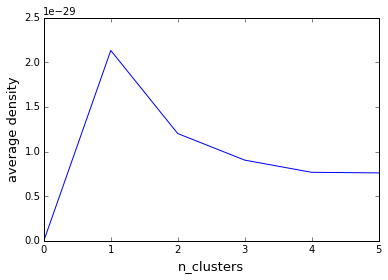

In [27]:
# densities = np.loadtxt("densities.txt")
plt.plot(np.array(densities))
# plt.plot(np.arange(1,30),np.array(densities))
plt.xlabel("n_clusters",fontsize=13)
plt.ylabel("average density",fontsize=13)
plt.xlim(0,5)

In [26]:
densities.index(max(densities))

1

In [2]:
import numpy as np
import yt
import sklearn
yt.funcs.mylog.setLevel(50)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cross_validation import cross_val_score
from sklearn.cluster import KMeans
from sklearn.grid_search import GridSearchCV
DEBUG= True
def debug(s,n=""):
    if DEBUG:
        print s , n
debug("Loading Particle Data")
ds = yt.load("../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
x = ad[("all","particle_position_x")]
y = ad[("all","particle_position_y")]
z = ad[("all","particle_position_z")]
debug("Creating train test split samples")
m = ad[("all","mass")]
idx = ad[("all","particle_index")]
train = []
test = []
N = 500#2097152#500
N_split = 100#524288#100
for n in np.arange(N):
    if n >N_split:
        train.append([idx[n],m[n].in_cgs(),x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
#         train.append([x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
    elif n<N_split:
        test.append([idx[n],m[n].in_cgs(),x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
#         test.append([x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
train = np.array(train)
test = np.array(test)
# debug("training set size : ", np.shape(train))
# debug("testing  set size : ", np.shape(test))
np.savetxt("test.txt",test)
np.savetxt("train.txt",train)
# Explicit Grid Search
k_range = range(1, 100)
# k_scores = []
# densf = open('densities.txt', 'a')


Loading Particle Data 
Creating train test split samples 


In [15]:
!rm avrg_dens.txt

In [16]:
avrg = open('avrg_dens.txt', 'a')
for k in k_range:
#     debug("{} clusters test".format(k))
    clf = KMeans(n_clusters=k)
#     debug(np.shape(train[:,2:]))
    clf.fit(train[:,2:])#ignoring idx and mass
    centers=clf.cluster_centers_
    labels = clf.labels_
    #Density calculation for each cluster
    densities =[]
    if k ==1:
        density =0 #undefined density for point mass 
        avrg.write(str(density)+"\n")
    else:
        for i in np.arange(k):
            numerator = 0
            n_tot = 0
            N=len(np.where(labels==i)[0])
    #             if np.linalg.norm(train[pcl_idx][2:]-centers[i])!=0:
            for pcl_idx in np.where(labels==i)[0]:
    #                 if i ==27: print "dist: ",np.linalg.norm(train[pcl_idx][2:]-centers[i])
                numerator += np.linalg.norm(train[pcl_idx][2:]-centers[i])
    #             if numerator ==0 : print i , numerator
    #             if i ==27: print "numerator: " , numerator
            if numerator !=0 :
                rad =numerator/N
                volume = (4./3.*np.pi*rad**3)
        #             if rad ==0 : print i , rad
        #             print volume
                mass = 2.75491975e43 * N
                density = mass / volume
            else:#ignore single centroid clusters
                N-=1
                density=0
            densities.append(density)
        avrg.write(str(mean(densities))+"\n")
    np.savetxt("density{}.txt".format(k),densities)
    np.savetxt("centers{}.txt".format(k),centers)
    np.savetxt("labels{}.txt".format(k),labels)
avrg.close()

Look like there are just some zero particle clusters that have zero, these are bad we should just throw them away and not count their densitiies because they are just an artifact

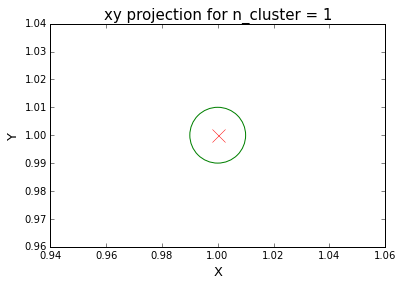

In [3]:
def verify_rad_calc(n_cluster,rcm,rad):
    fig  = plt.figure()
    plt.title("xy projection for n_cluster = {}".format(n_cluster),fontsize=15)
#     plt.plot(centers[:,0], centers[:,1],'o')
    plt.plot(rcm[0],rcm[1],"x", color = "red", markersize=13)
    circle1 = plt.Circle((rcm[0],rcm[1]),rad,color='g',fill=False)
    fig.gca().add_artist(circle1)
    plt.xlabel("X",fontsize=13)
    plt.ylabel("Y",fontsize=13)
    axes().set_aspect('equal', 'datalim')
    plt.show()
verify_rad_calc(1,[1,1],0.01)

In [5]:
# np.linalg.norm(train[pcl_idx][2:]-centers[i])a

In [47]:
train[pcl_idx][:3]

array([  3.06600000e+03,   2.75491975e+43,  -1.13265316e+26])

In [40]:
centers[1]

array([ -1.29986298e+26,  -1.10538461e+26,  -1.37329221e+26])

In [52]:
train[1][2:] #x y z position for particle 1 

array([ -1.19231835e+26,  -1.39234029e+26,  -1.37641928e+26])

In [17]:
# dens = np.loadtxt("densities.txt")
avrage= np.loadtxt("avrg_dens.txt")

In [18]:
shape(avrage)

(99,)

In [19]:
avrage

array([  0.00000000e+00,   5.16216988e-30,   6.32417743e-30,
         6.47772720e-30,   7.22283227e-30,   7.93749354e-30,
         7.31423447e-30,   8.06557896e-30,   1.22138349e-29,
         1.36188842e-29,   1.56153589e-29,   1.97732540e-29,
         1.47471652e-29,   1.96701013e-29,   1.88825851e-29,
         2.05586927e-29,   2.20811798e-29,   2.40067509e-29,
         1.89927611e-29,   1.95207861e-29,   1.99804804e-29,
         2.37420797e-29,   2.13979636e-29,   2.34752613e-29,
         2.13519770e-29,   2.07580945e-29,   2.34427806e-29,
         2.53538830e-29,   1.98944671e-29,   2.95147810e-29,
         2.61421964e-29,   2.04125739e-29,   2.43402745e-29,
         2.93836221e-29,   1.98634839e-28,   2.23950247e-29,
         1.91274770e-28,   1.82211317e-28,   1.33302107e-28,
         1.80760195e-28,   2.57870482e-29,   1.81115328e-28,
         1.75053678e-28,   3.64804802e-29,   3.68352764e-29,
         4.45176464e-29,   2.61307282e-28,   1.61018697e-28,
         2.94119988e-28,

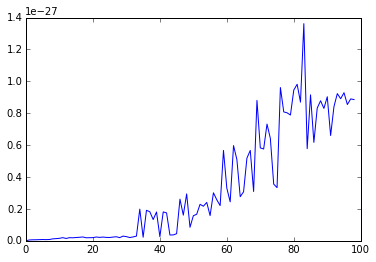

In [20]:
plt.plot(avrage)